In [2]:
import pandas as pd

In [3]:
diabetesData = pd.read_csv('diabetes.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distribution_by_descriptor(data, column, descriptor_column, plot_type='histogram', 
                                   figsize=(12, 6), bins=30, alpha=0.7):
    """
    Plot the distribution of a column split by a descriptor column.
    
    MAGNA Data Science

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset containing the columns to plot
    column : str
        The name of the column whose distribution to plot
    descriptor_column : str
        The name of the column to split the data by (e.g., 'Outcome', 'Gender', etc.)
    plot_type : str, default='histogram'
        Type of plot: 'histogram', 'density', 'boxplot', 'violin', or 'all'
    figsize : tuple, default=(12, 6)
        Figure size as (width, height)
    bins : int, default=30
        Number of bins for histogram
    alpha : float, default=0.7
        Transparency level for overlapping plots
    
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    """
    
    # Validate inputs
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in the dataset")
    if descriptor_column not in data.columns:
        raise ValueError(f"Descriptor column '{descriptor_column}' not found in the dataset")
    
    # Get unique values in descriptor column
    descriptor_values = data[descriptor_column].unique()
    descriptor_values = sorted(descriptor_values)  # Sort for consistent ordering
    
    # Set up color palette
    colors = plt.cm.Set1(np.linspace(0, 1, len(descriptor_values)))
    
    if plot_type == 'all':
        # Create a 2x2 subplot for multiple plot types
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Distribution of {column} by {descriptor_column}', fontsize=16, fontweight='bold')
        
        # Histogram
        ax1 = axes[0, 0]
        for i, desc_val in enumerate(descriptor_values):
            subset = data[data[descriptor_column] == desc_val][column]
            ax1.hist(subset, bins=bins, alpha=alpha, label=f'{descriptor_column}={desc_val}', 
                    color=colors[i], edgecolor='black', linewidth=0.5)
        ax1.set_title('Histogram')
        ax1.set_xlabel(column)
        ax1.set_ylabel('Frequency')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Density plot
        ax2 = axes[0, 1]
        for i, desc_val in enumerate(descriptor_values):
            subset = data[data[descriptor_column] == desc_val][column]
            subset.plot.density(ax=ax2, alpha=alpha, label=f'{descriptor_column}={desc_val}', 
                              color=colors[i], linewidth=2)
        ax2.set_title('Density Plot')
        ax2.set_xlabel(column)
        ax2.set_ylabel('Density')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Box plot
        ax3 = axes[1, 0]
        data_for_box = [data[data[descriptor_column] == desc_val][column] for desc_val in descriptor_values]
        box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(alpha)
        ax3.set_title('Box Plot')
        ax3.set_xlabel(descriptor_column)
        ax3.set_ylabel(column)
        ax3.grid(True, alpha=0.3)
        
        # Violin plot
        ax4 = axes[1, 1]
        violin_data = []
        violin_labels = []
        for desc_val in descriptor_values:
            subset = data[data[descriptor_column] == desc_val][column]
            violin_data.append(subset)
            violin_labels.append(f'{desc_val}')
        
        violin_plot = ax4.violinplot(violin_data, positions=range(1, len(descriptor_values) + 1))
        for i, patch in enumerate(violin_plot['bodies']):
            patch.set_facecolor(colors[i])
            patch.set_alpha(alpha)
        ax4.set_title('Violin Plot')
        ax4.set_xlabel(descriptor_column)
        ax4.set_ylabel(column)
        ax4.set_xticks(range(1, len(descriptor_values) + 1))
        ax4.set_xticklabels(violin_labels)
        ax4.grid(True, alpha=0.3)
        
    else:
        # Create single plot
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(f'Distribution of {column} by {descriptor_column}', fontsize=14, fontweight='bold')
        
        if plot_type == 'histogram':
            for i, desc_val in enumerate(descriptor_values):
                subset = data[data[descriptor_column] == desc_val][column]
                ax.hist(subset, bins=bins, alpha=alpha, label=f'{descriptor_column}={desc_val}', 
                       color=colors[i], edgecolor='black', linewidth=0.5)
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
        elif plot_type == 'density':
            for i, desc_val in enumerate(descriptor_values):
                subset = data[data[descriptor_column] == desc_val][column]
                subset.plot.density(ax=ax, alpha=alpha, label=f'{descriptor_column}={desc_val}', 
                                  color=colors[i], linewidth=2)
            ax.set_xlabel(column)
            ax.set_ylabel('Density')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
        elif plot_type == 'boxplot':
            data_for_box = [data[data[descriptor_column] == desc_val][column] for desc_val in descriptor_values]
            box_plot = ax.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)
            for patch, color in zip(box_plot['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(alpha)
            ax.set_xlabel(descriptor_column)
            ax.set_ylabel(column)
            ax.grid(True, alpha=0.3)
            
        elif plot_type == 'violin':
            violin_data = []
            violin_labels = []
            for desc_val in descriptor_values:
                subset = data[data[descriptor_column] == desc_val][column]
                violin_data.append(subset)
                violin_labels.append(f'{desc_val}')
            
            violin_plot = ax.violinplot(violin_data, positions=range(1, len(descriptor_values) + 1))
            for i, patch in enumerate(violin_plot['bodies']):
                patch.set_facecolor(colors[i])
                patch.set_alpha(alpha)
            ax.set_xlabel(descriptor_column)
            ax.set_ylabel(column)
            ax.set_xticks(range(1, len(descriptor_values) + 1))
            ax.set_xticklabels(violin_labels)
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Print summary statistics
    print(f"\nSummary Statistics for {column} by {descriptor_column}:")
    print("=" * 60)
    for desc_val in descriptor_values:
        subset = data[data[descriptor_column] == desc_val][column]
        print(f"\n{descriptor_column} = {desc_val}:")
        print(f"  Count: {len(subset)}")
        print(f"  Mean: {subset.mean():.2f}")
        print(f"  Std: {subset.std():.2f}")
        print(f"  Min: {subset.min():.2f}")
        print(f"  Max: {subset.max():.2f}")
        print(f"  Median: {subset.median():.2f}")
    
    return fig

# Test the function
print("Function created successfully!")
print("\nDataset columns available:")
print(diabetesData.columns.tolist())
print(f"\nDataset shape: {diabetesData.shape}")

Function created successfully!

Dataset columns available:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Dataset shape: (768, 9)


## Function Usage Guide

The `plot_distribution_by_descriptor()` function is a comprehensive tool for visualizing how a numerical variable is distributed across different groups defined by a categorical descriptor variable.

### Parameters:
- **data**: Your pandas DataFrame
- **column**: The numerical column you want to analyze (e.g., 'Glucose', 'BMI', 'Age')
- **descriptor_column**: The categorical column to split by (e.g., 'Outcome', 'Gender', etc.)
- **plot_type**: Choose from:
  - `'histogram'`: Shows frequency distributions with overlapping bars
  - `'density'`: Shows smooth probability density curves 
  - `'boxplot'`: Shows quartiles, median, and outliers
  - `'violin'`: Shows full distribution shape
  - `'all'`: Shows all four plot types in a 2x2 grid
- **figsize**: Tuple for figure size (width, height)
- **bins**: Number of bins for histogram (default: 30)
- **alpha**: Transparency level (0-1, default: 0.7)



Summary Statistics for Glucose by Outcome:

Outcome = 0:
  Count: 500
  Mean: 109.98
  Std: 26.14
  Min: 0.00
  Max: 197.00
  Median: 107.00

Outcome = 1:
  Count: 268
  Mean: 141.26
  Std: 31.94
  Min: 0.00
  Max: 199.00
  Median: 140.00


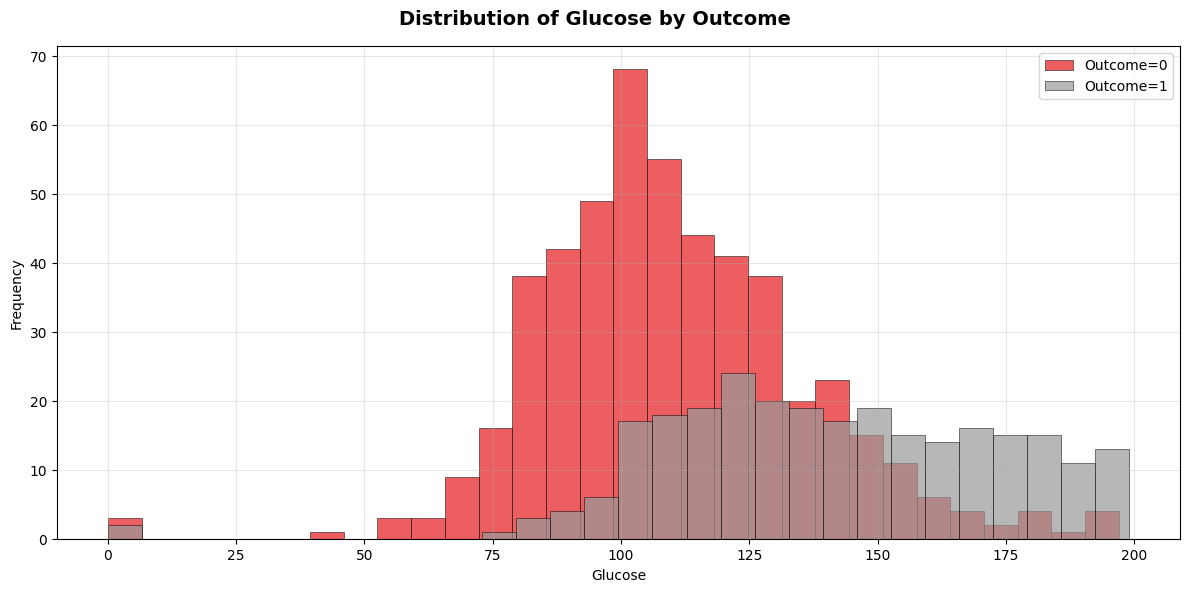

In [5]:
fig1 = plot_distribution_by_descriptor(diabetesData, 'Glucose', 'Outcome', plot_type='histogram')
plt.show()


Summary Statistics for BMI by Outcome:

Outcome = 0:
  Count: 500
  Mean: 30.30
  Std: 7.69
  Min: 0.00
  Max: 57.30
  Median: 30.05

Outcome = 1:
  Count: 268
  Mean: 35.14
  Std: 7.26
  Min: 0.00
  Max: 67.10
  Median: 34.25


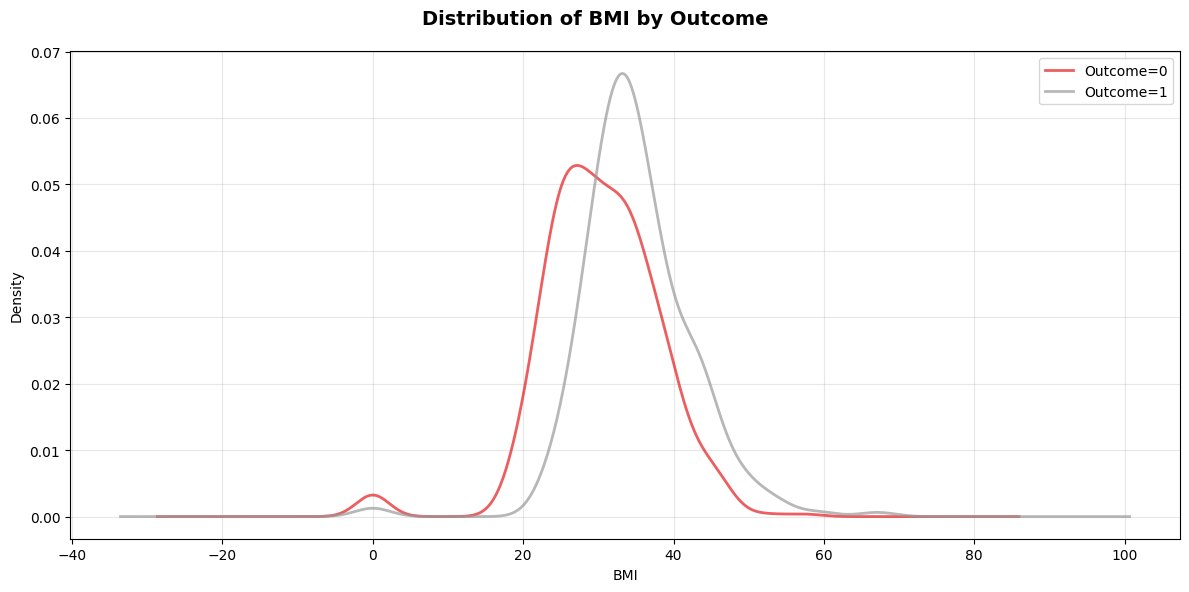

In [6]:
fig2 = plot_distribution_by_descriptor(diabetesData, 'BMI', 'Outcome', plot_type='density')
plt.show()


Summary Statistics for Age by Outcome:

Outcome = 0:
  Count: 500
  Mean: 31.19
  Std: 11.67
  Min: 21.00
  Max: 81.00
  Median: 27.00

Outcome = 1:
  Count: 268
  Mean: 37.07
  Std: 10.97
  Min: 21.00
  Max: 70.00
  Median: 36.00


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:136: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


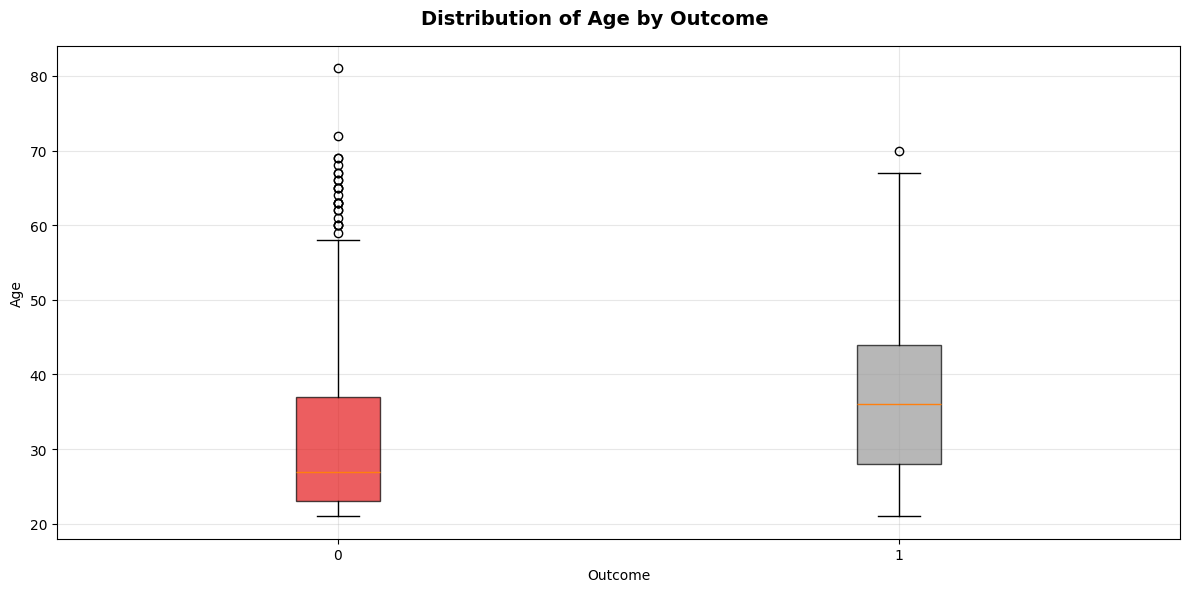

In [7]:
fig3 = plot_distribution_by_descriptor(diabetesData, 'Age', 'Outcome', plot_type='boxplot')
plt.show()

C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)



Summary Statistics for Insulin by Outcome:

Outcome = 0:
  Count: 500
  Mean: 68.79
  Std: 98.87
  Min: 0.00
  Max: 744.00
  Median: 39.00

Outcome = 1:
  Count: 268
  Mean: 100.34
  Std: 138.69
  Min: 0.00
  Max: 846.00
  Median: 0.00


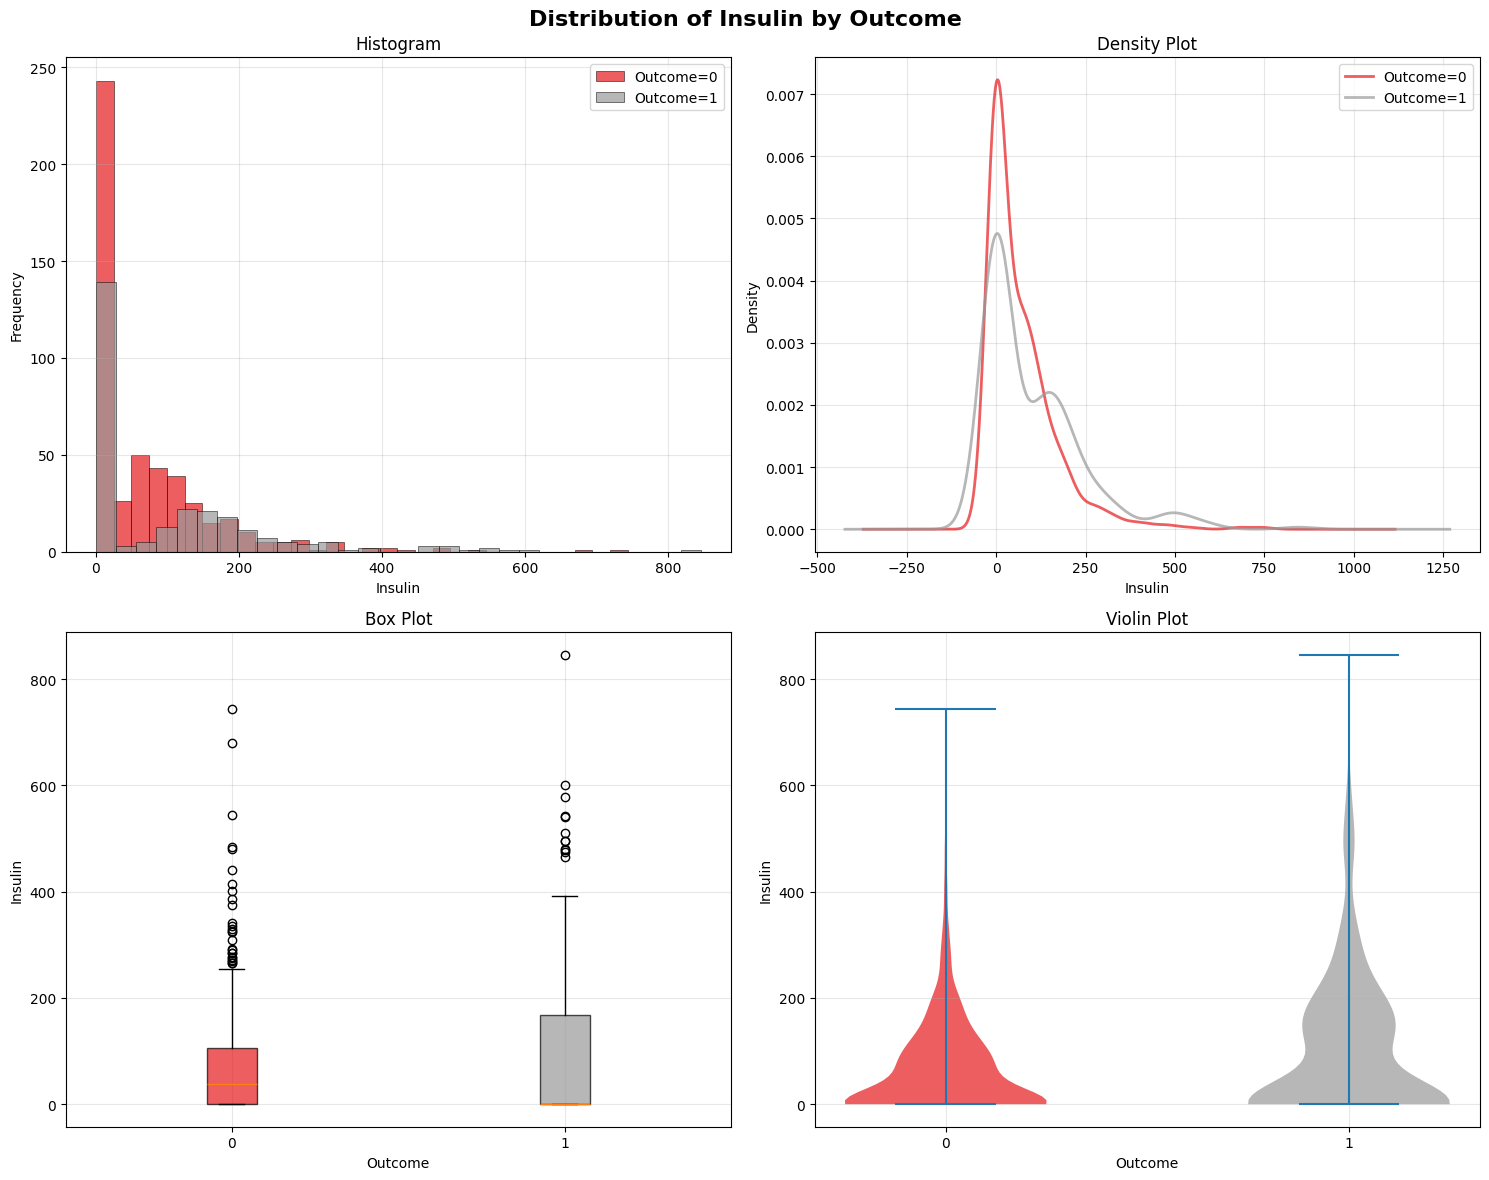

In [8]:
fig4 = plot_distribution_by_descriptor(diabetesData, 'Insulin', 'Outcome', plot_type='all')
plt.show()


==================== PREGNANCIES ====================

Summary Statistics for Pregnancies by Outcome:

Outcome = 0:
  Count: 500
  Mean: 3.30
  Std: 3.02
  Min: 0.00
  Max: 13.00
  Median: 2.00

Outcome = 1:
  Count: 268
  Mean: 4.87
  Std: 3.74
  Min: 0.00
  Max: 17.00
  Median: 4.00


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


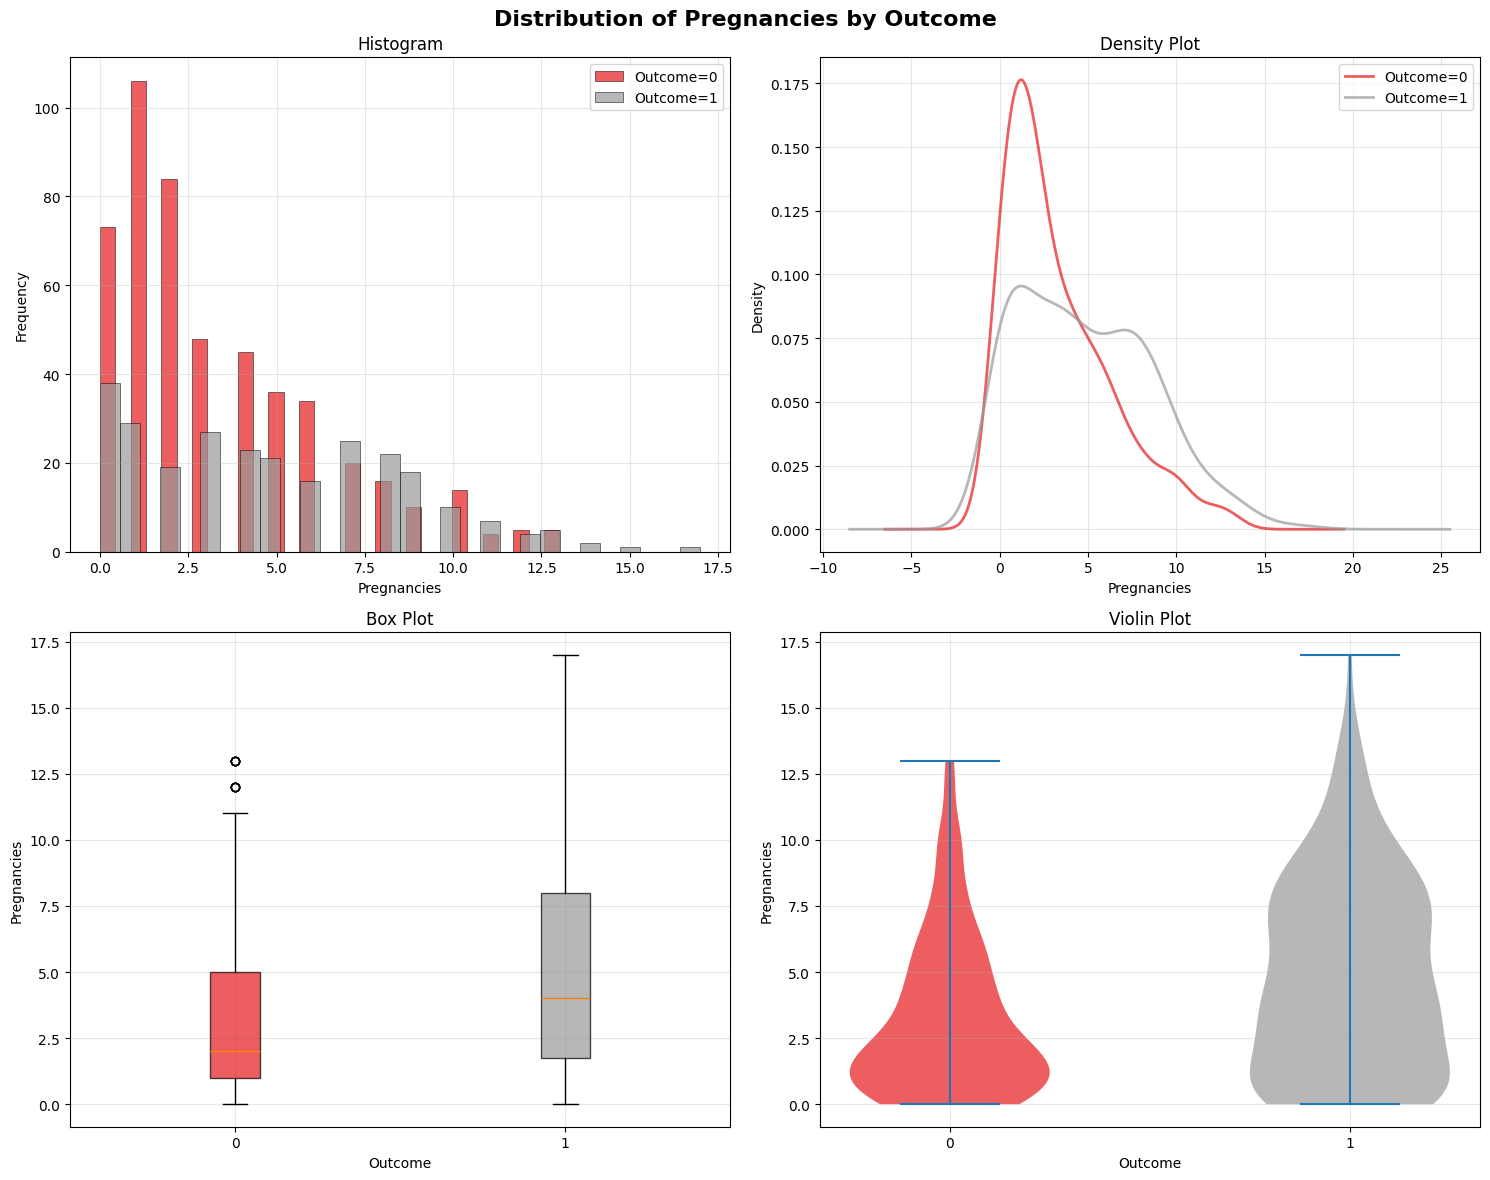


==================== GLUCOSE ====================

Summary Statistics for Glucose by Outcome:

Outcome = 0:
  Count: 500
  Mean: 109.98
  Std: 26.14
  Min: 0.00
  Max: 197.00
  Median: 107.00

Outcome = 1:
  Count: 268
  Mean: 141.26
  Std: 31.94
  Min: 0.00
  Max: 199.00
  Median: 140.00


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


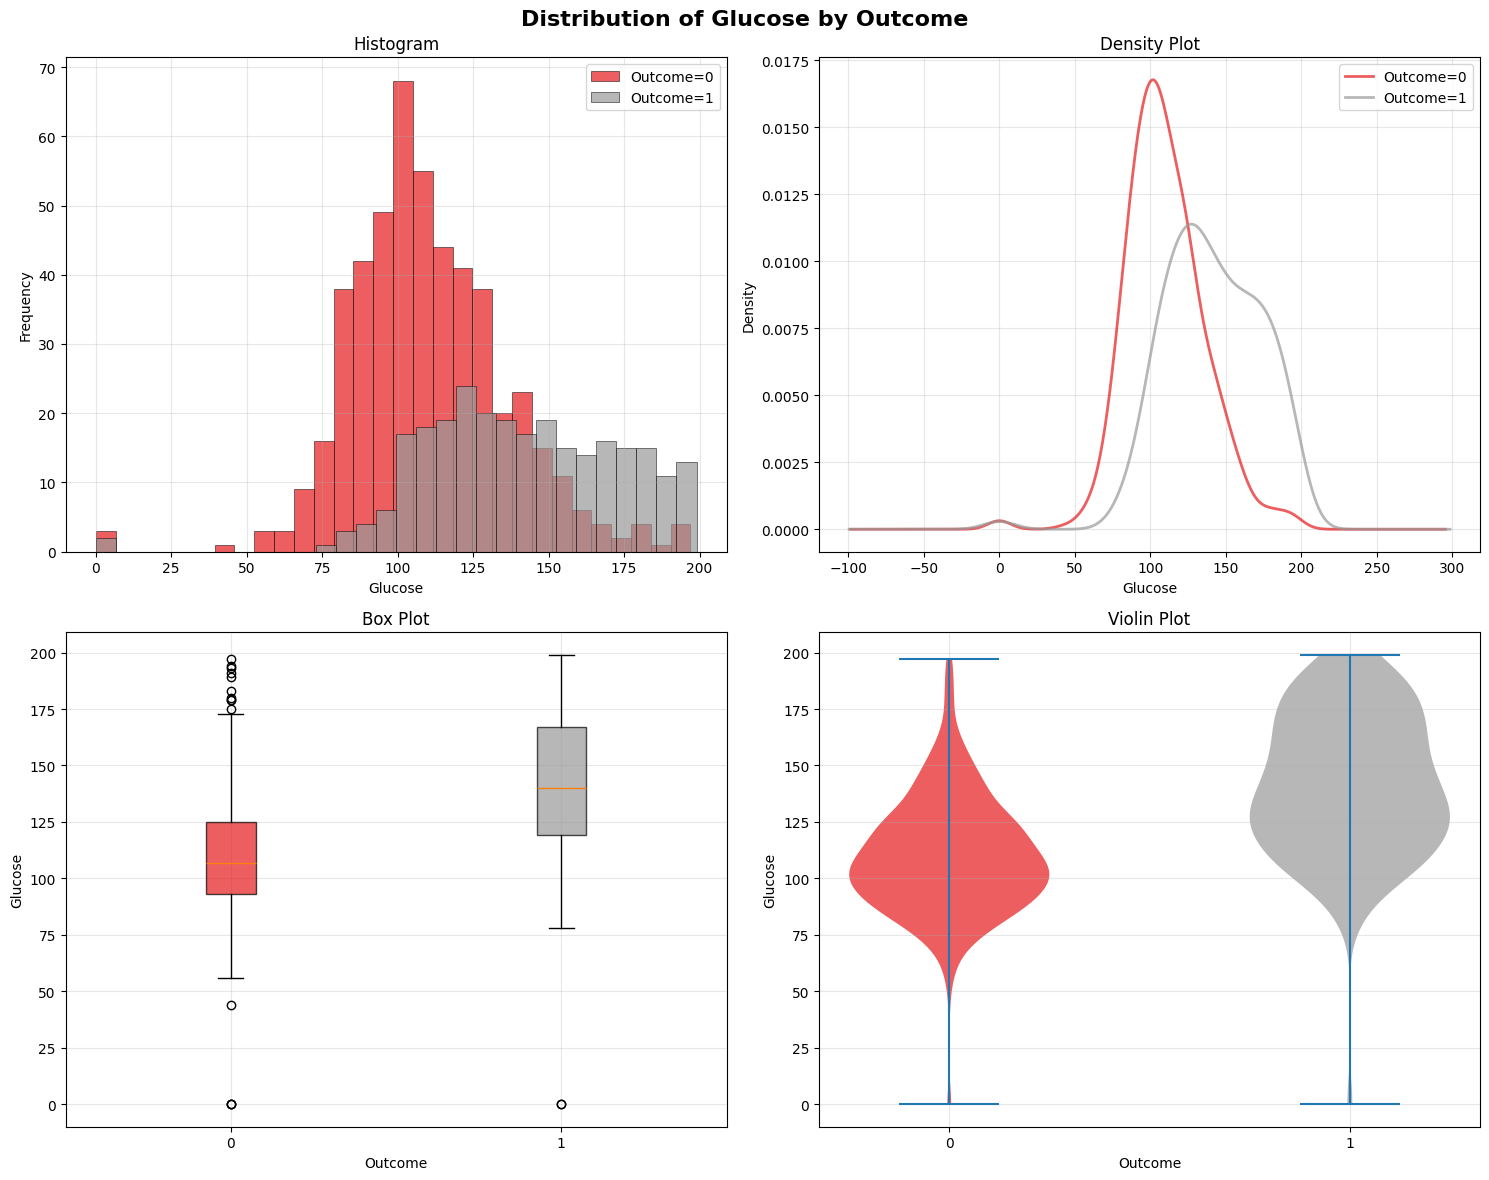


==================== BLOODPRESSURE ====================

Summary Statistics for BloodPressure by Outcome:

Outcome = 0:
  Count: 500
  Mean: 68.18
  Std: 18.06
  Min: 0.00
  Max: 122.00
  Median: 70.00

Outcome = 1:
  Count: 268
  Mean: 70.82
  Std: 21.49
  Min: 0.00
  Max: 114.00
  Median: 74.00


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


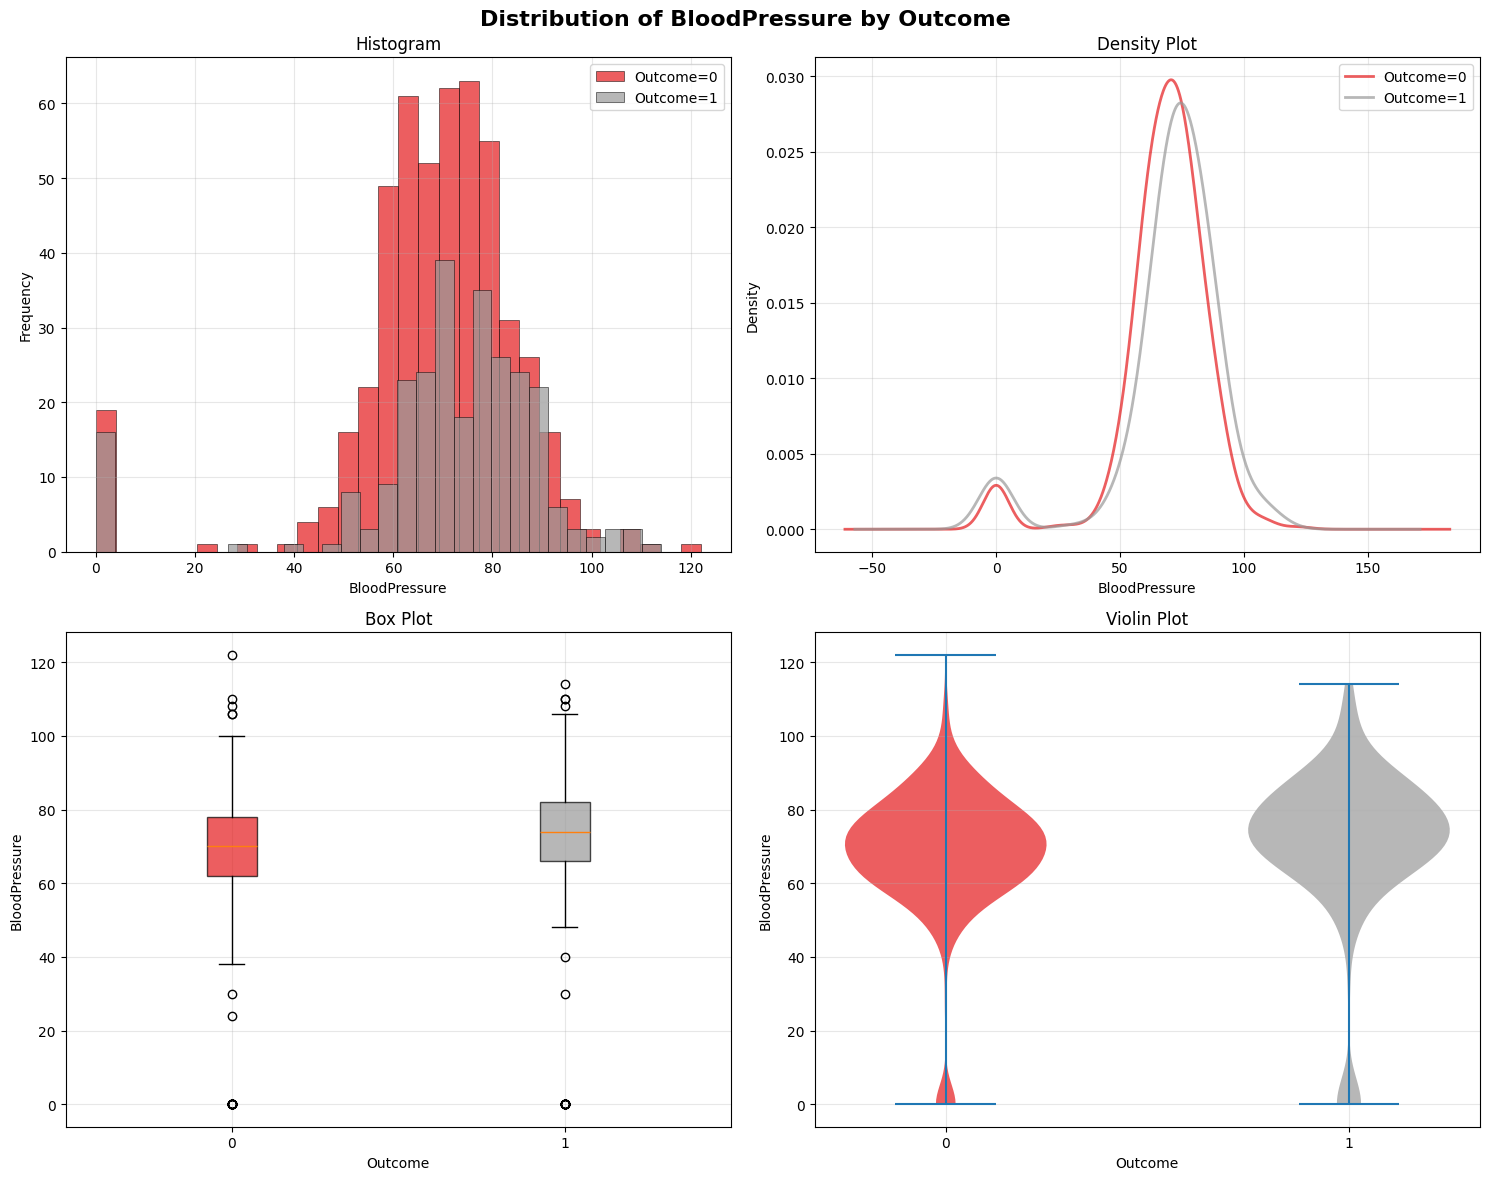


==================== SKINTHICKNESS ====================

Summary Statistics for SkinThickness by Outcome:

Outcome = 0:
  Count: 500
  Mean: 19.66
  Std: 14.89
  Min: 0.00
  Max: 60.00
  Median: 21.00

Outcome = 1:
  Count: 268
  Mean: 22.16
  Std: 17.68
  Min: 0.00
  Max: 99.00
  Median: 27.00


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


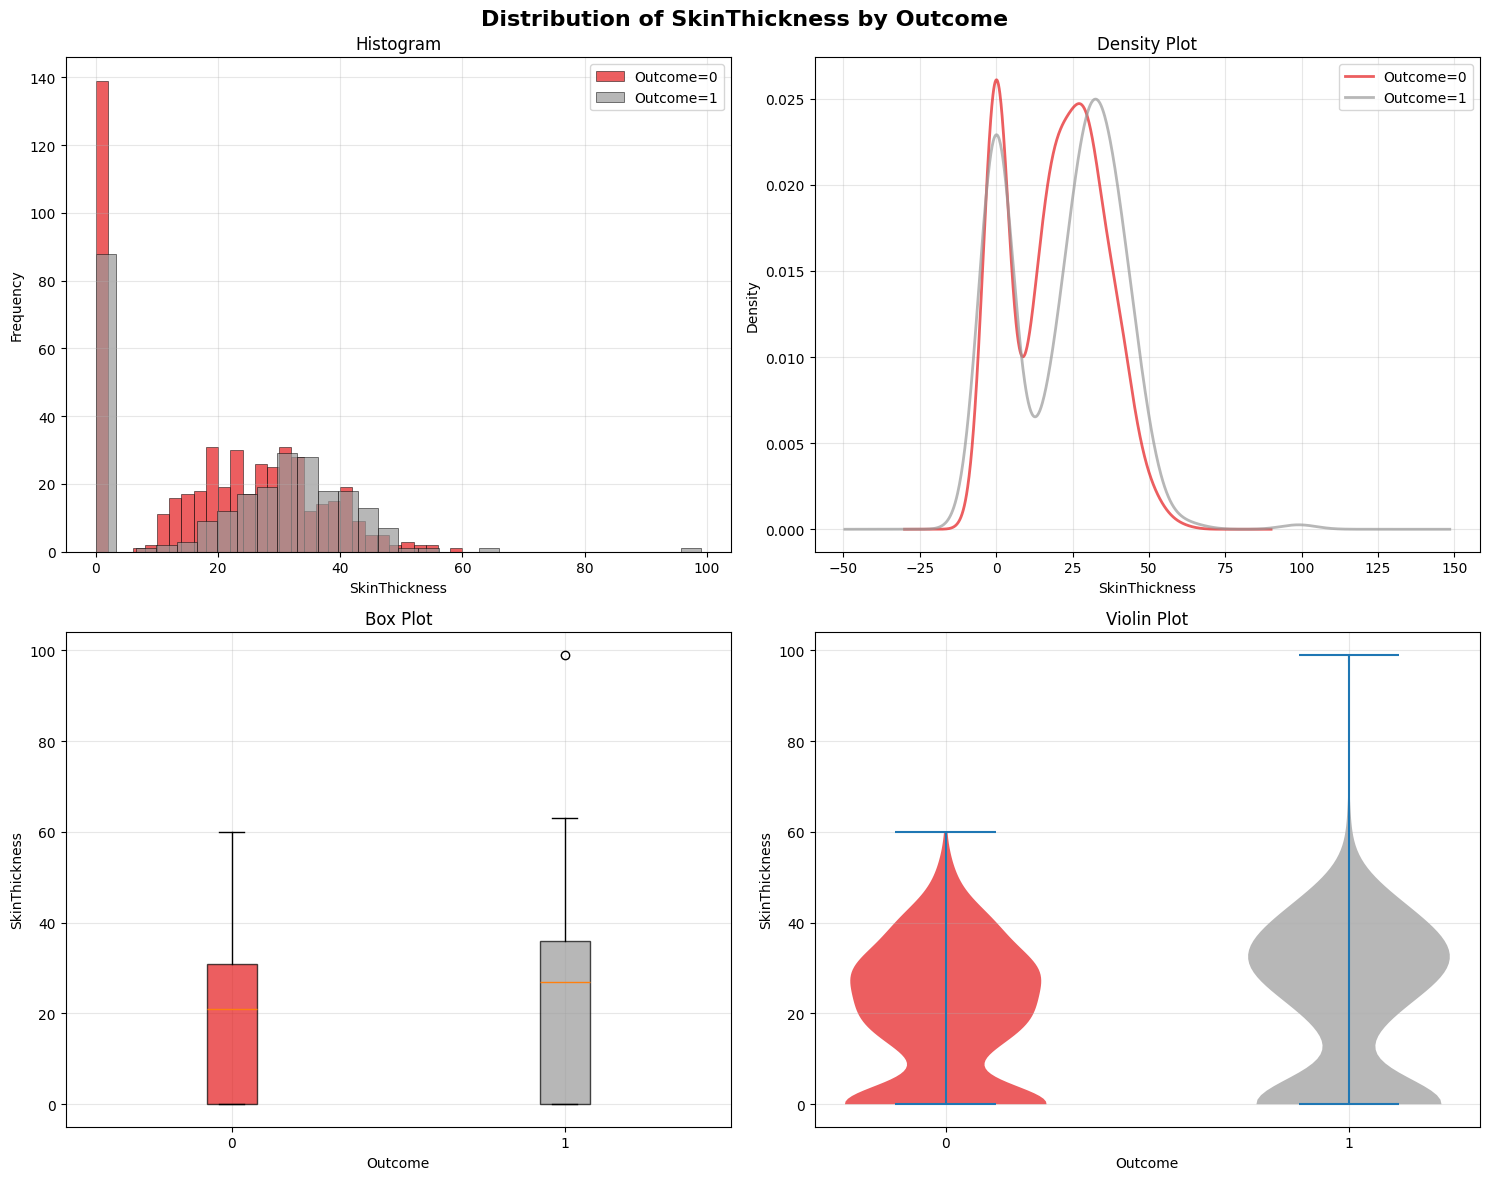


==================== INSULIN ====================

Summary Statistics for Insulin by Outcome:

Outcome = 0:
  Count: 500
  Mean: 68.79
  Std: 98.87
  Min: 0.00
  Max: 744.00
  Median: 39.00

Outcome = 1:
  Count: 268
  Mean: 100.34
  Std: 138.69
  Min: 0.00
  Max: 846.00
  Median: 0.00


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


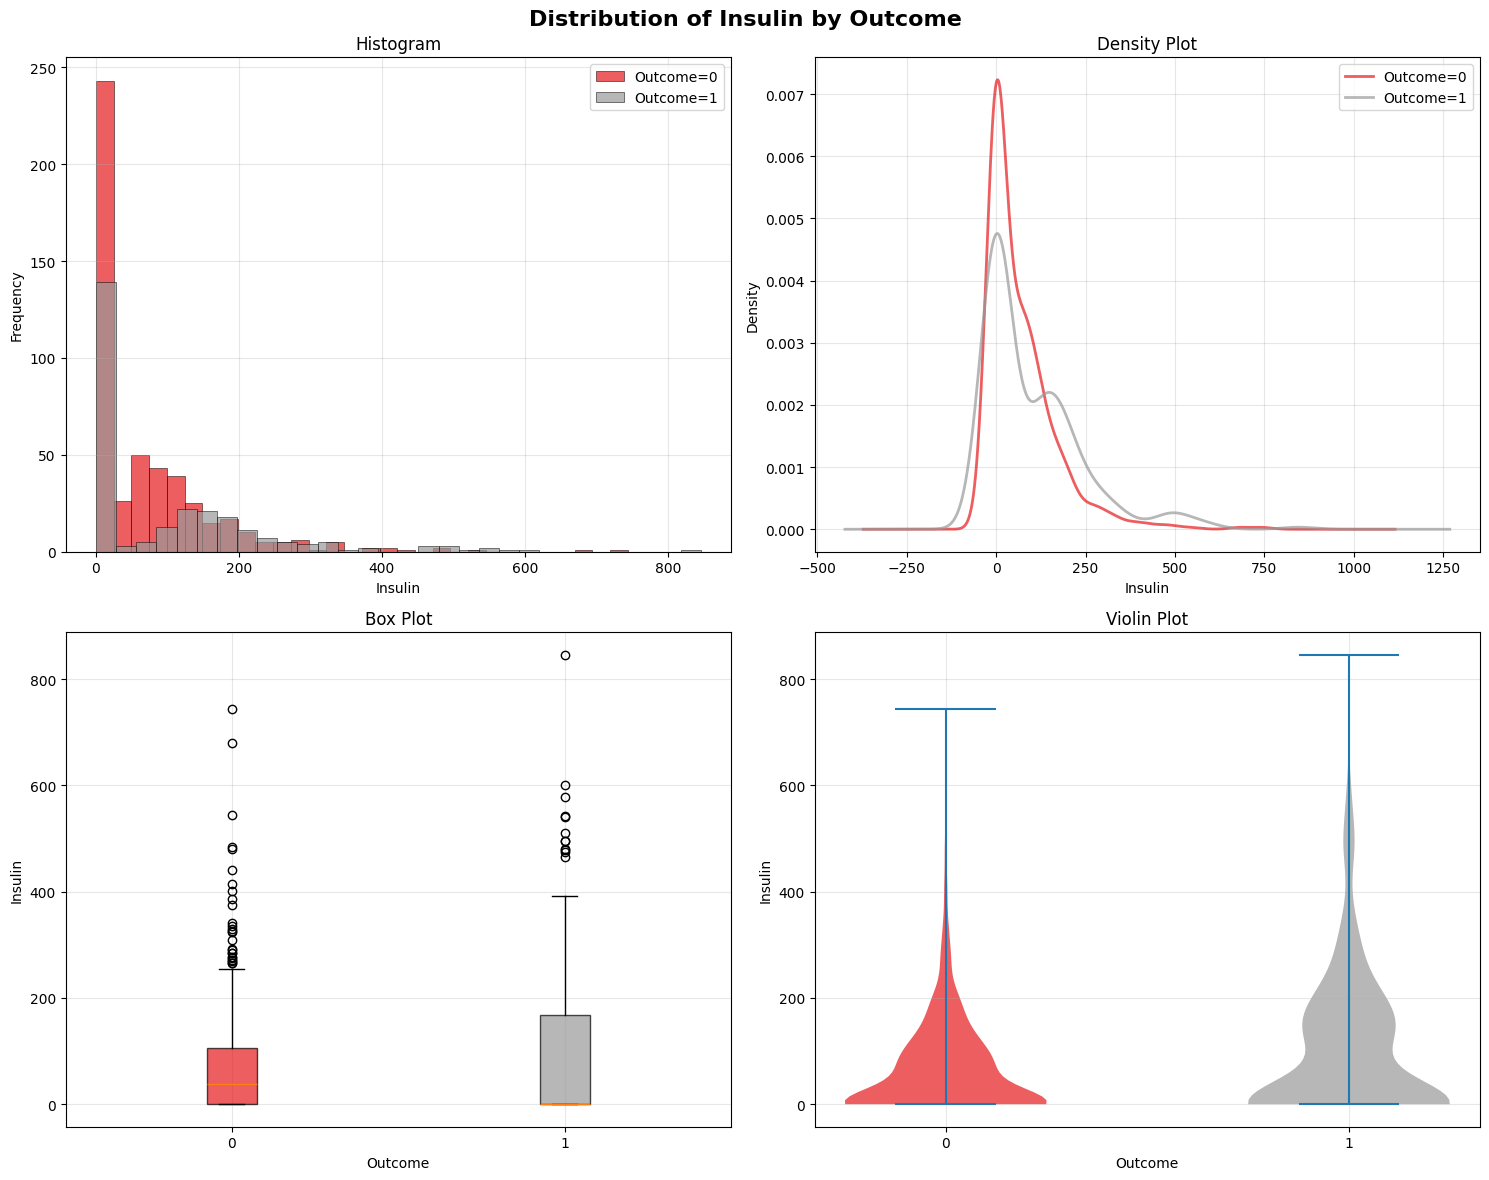


==================== BMI ====================

Summary Statistics for BMI by Outcome:

Outcome = 0:
  Count: 500
  Mean: 30.30
  Std: 7.69
  Min: 0.00
  Max: 57.30
  Median: 30.05

Outcome = 1:
  Count: 268
  Mean: 35.14
  Std: 7.26
  Min: 0.00
  Max: 67.10
  Median: 34.25


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


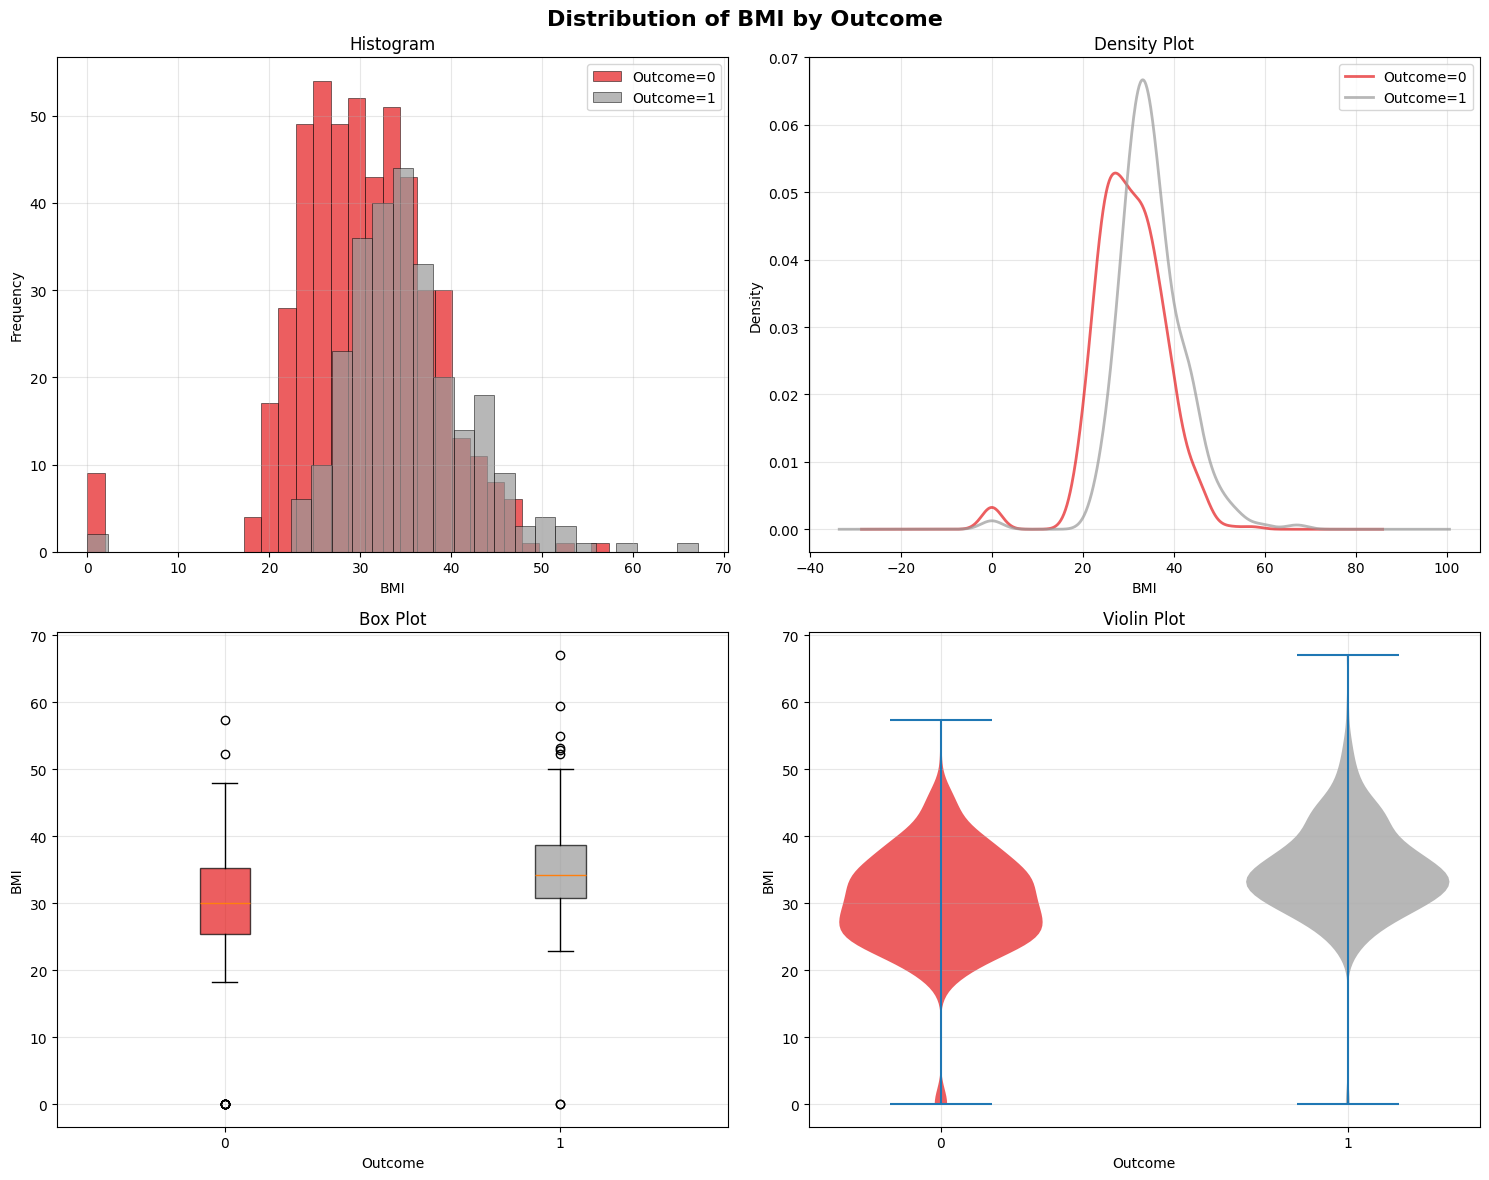


==================== DIABETESPEDIGREEFUNCTION ====================

Summary Statistics for DiabetesPedigreeFunction by Outcome:

Outcome = 0:
  Count: 500
  Mean: 0.43
  Std: 0.30
  Min: 0.08
  Max: 2.33
  Median: 0.34

Outcome = 1:
  Count: 268
  Mean: 0.55
  Std: 0.37
  Min: 0.09
  Max: 2.42
  Median: 0.45


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


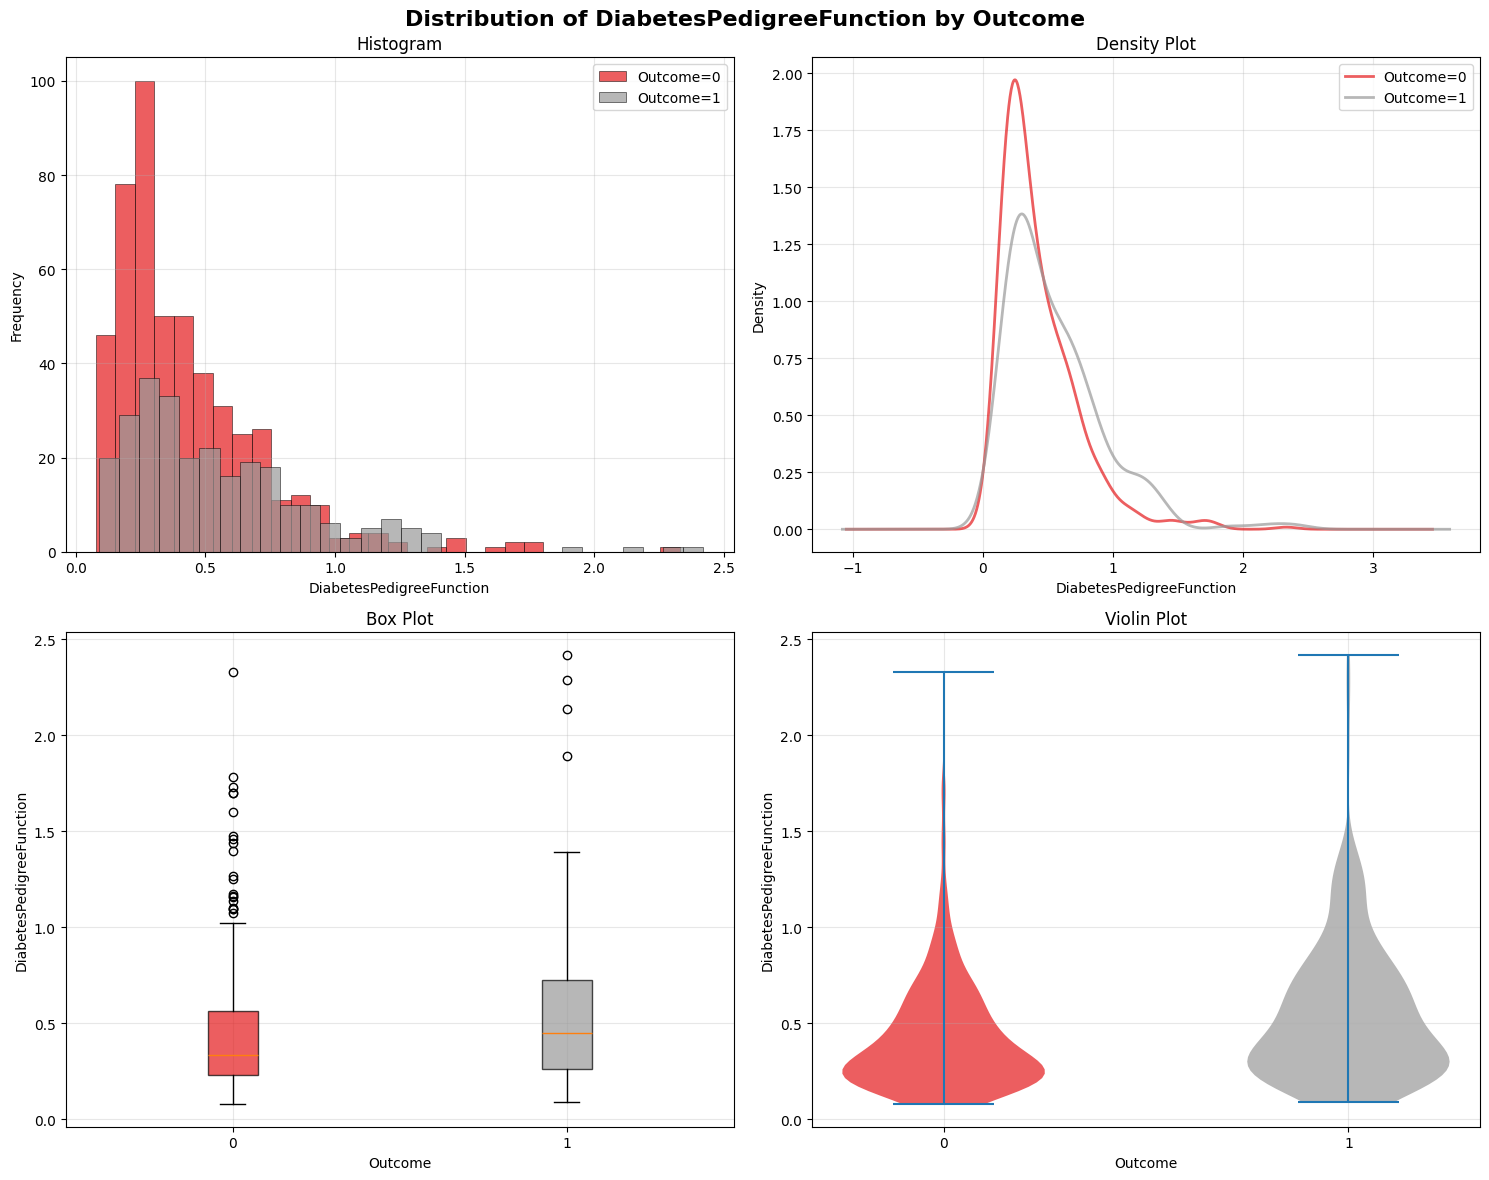


==================== AGE ====================

Summary Statistics for Age by Outcome:

Outcome = 0:
  Count: 500
  Mean: 31.19
  Std: 11.67
  Min: 21.00
  Max: 81.00
  Median: 27.00

Outcome = 1:
  Count: 268
  Mean: 37.07
  Std: 10.97
  Min: 21.00
  Max: 70.00
  Median: 36.00


C:\Users\joshua.harvey\AppData\Local\Temp\ipykernel_2096\3062871434.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax3.boxplot(data_for_box, labels=descriptor_values, patch_artist=True)


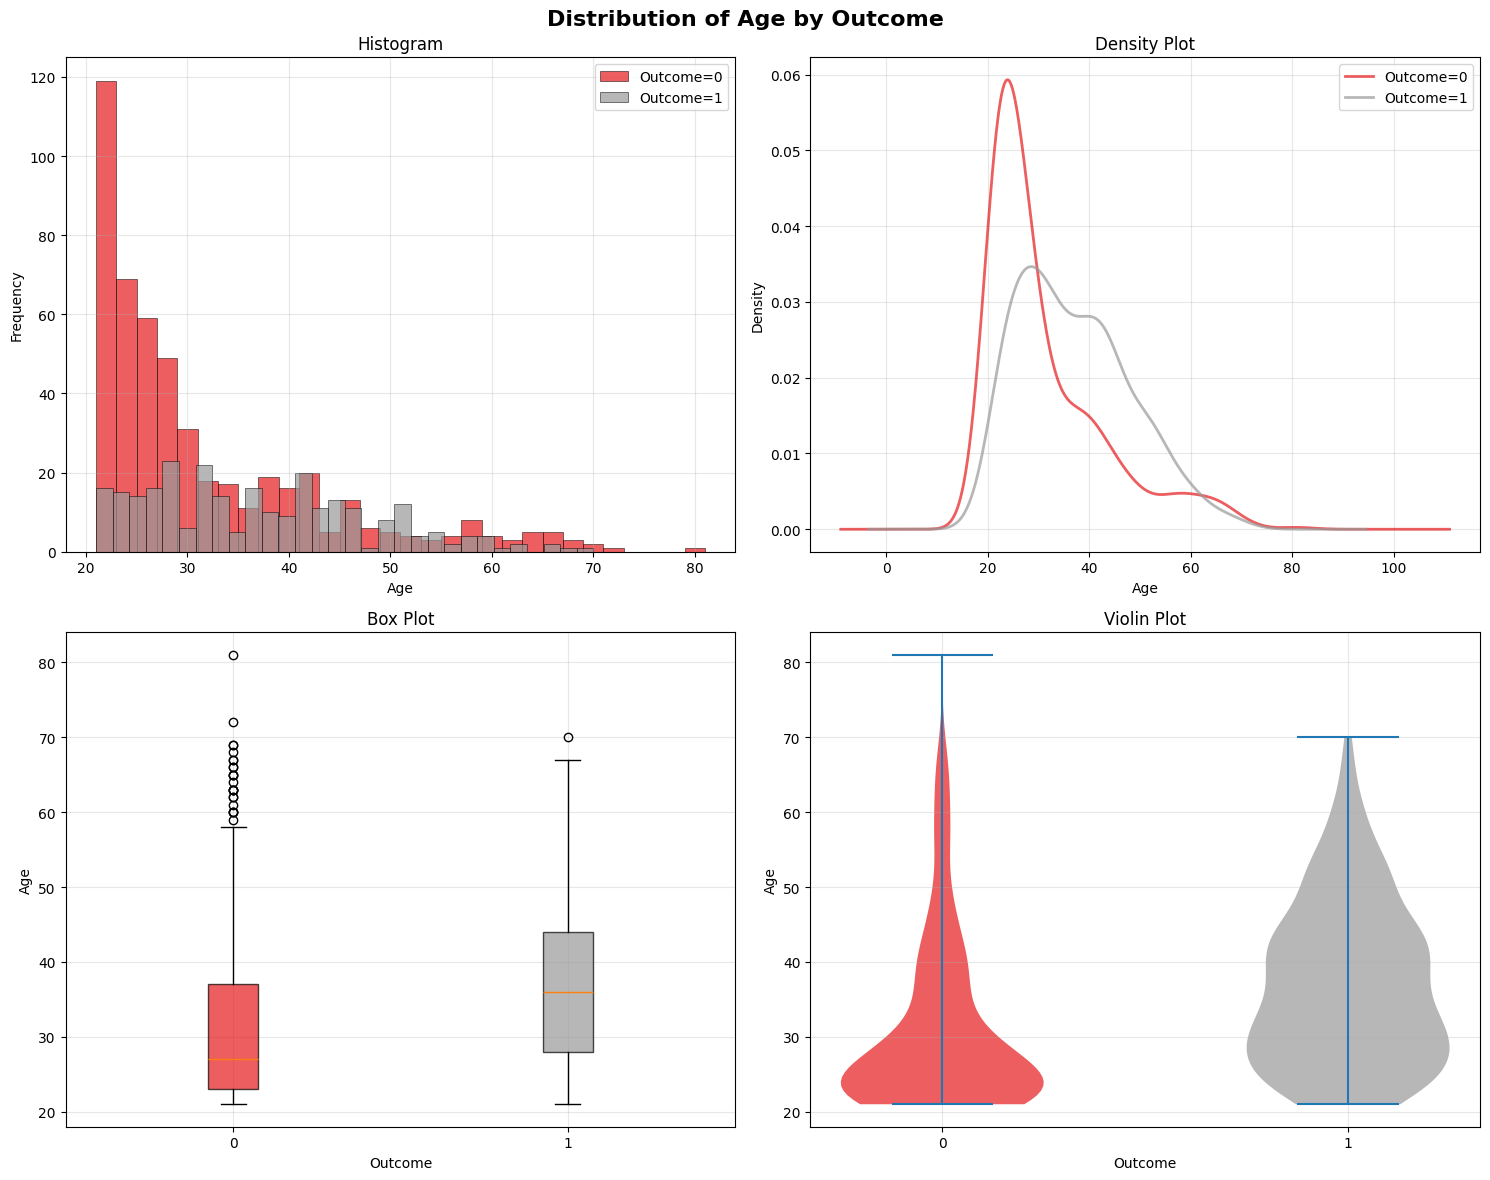

In [9]:
# Generate all distribution plots for numerical columns against Outcome
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


for column in numerical_columns:
    print(f"\n{'='*20} {column.upper()} {'='*20}")
    fig = plot_distribution_by_descriptor(diabetesData, column, 'Outcome', plot_type='all')
    plt.show()